In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
model = cv2.imread('image_01.png', 0)
withglass = cv2.imread('image_02.png', 0)
group = cv2.imread('image_03.jpeg', 0)

# Display images
plt.imshow(model, cmap='gray')
plt.show()
plt.imshow(withglass, cmap='gray')

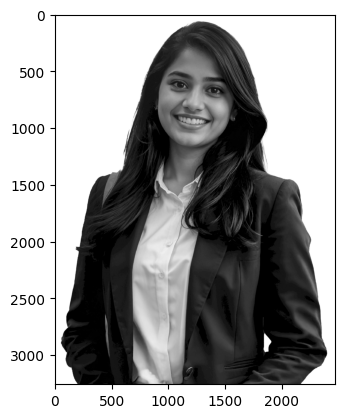

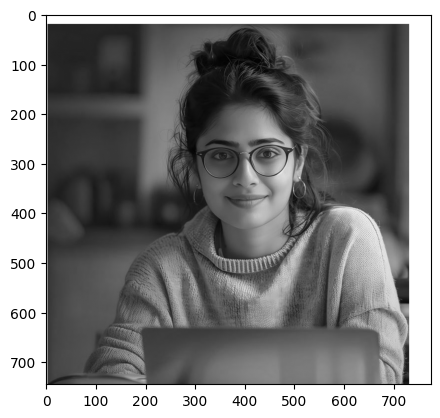

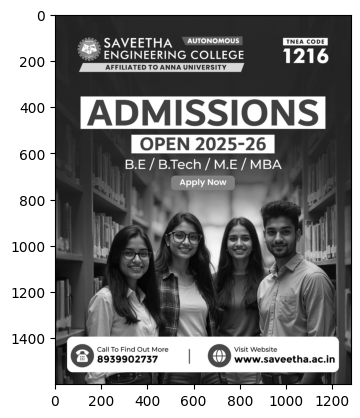

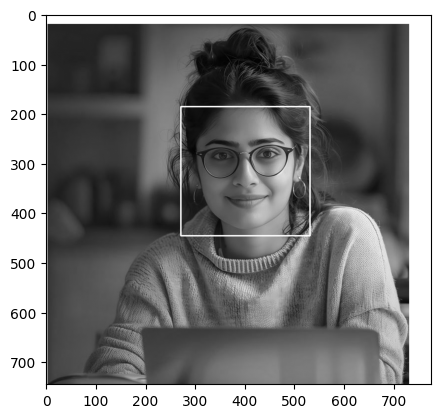

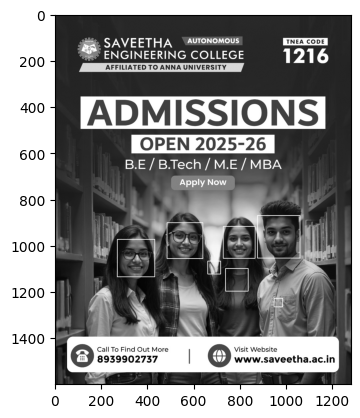

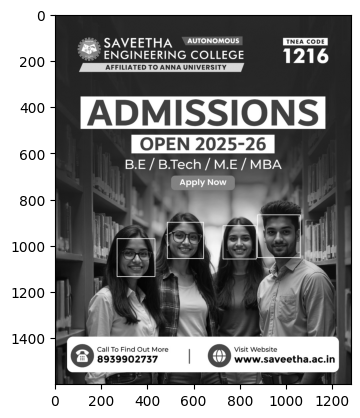

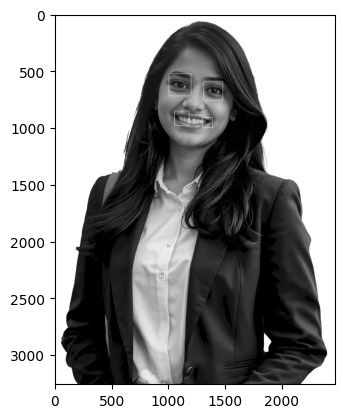

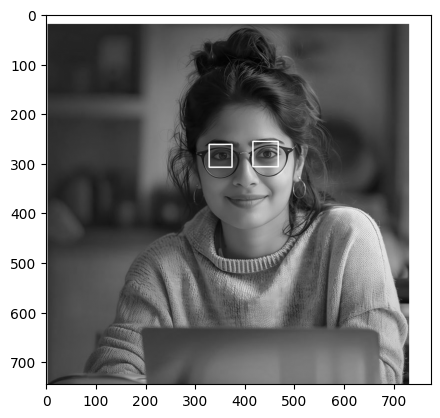

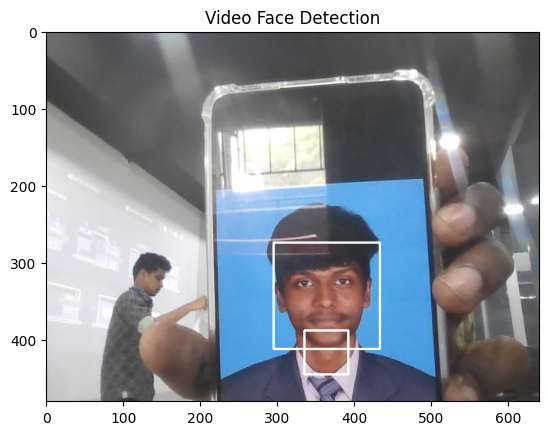

In [ ]:
plt.show()
plt.imshow(group, cmap='gray')
plt.show()

# Load Haar cascades with full paths
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Check if cascades loaded successfully
if face_cascade.empty():
    print("Error loading face cascade!")
if eye_cascade.empty():
    print("Error loading eye cascade!")

# Face detection function
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

result = detect_face(withglass)
plt.imshow(result, cmap='gray')
plt.show()

result = detect_face(group)
plt.imshow(result, cmap='gray')
plt.show()

# Adjusted detection
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

result = adj_detect_face(group)
plt.imshow(result, cmap='gray')
plt.show()

# Eye detection function
def detect_eyes(img):
    face_img = img.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in eyes:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

result = detect_eyes(model)
plt.imshow(result, cmap='gray')
plt.show()

result = detect_eyes(withglass)
plt.imshow(result, cmap='gray')
plt.show()

# Live webcam detection
cap = cv2.VideoCapture(0)
plt.ion()
fig, ax = plt.subplots()

ret, frame = cap.read()
if ret:
    frame = detect_face(frame)
    im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Video Face Detection')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = detect_face(frame)
    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.10)
    # Optional: Add a break condition (like pressing 'q') if using OpenCV window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
plt.close()